<a href="https://colab.research.google.com/github/eshal26/store-sales-forecast/blob/main/Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Store Sales Forecast </h1>

<h2>Data Loading and installing packages</h2>

In [1]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from prophet.diagnostics import cross_validation, performance_metrics

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df.shape

(3000888, 6)

In [5]:
df.dtypes

,0
id,int64
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64


In [6]:
df=df[['date','sales']]

In [7]:
df.head()

,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0


<h2>Preparing data for prophet</h2>

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df.groupby('date',as_index=False).mean()
print(df.head())

        date       sales
0 2013-01-01    1.409438
1 2013-01-02  278.390807
2 2013-01-03  202.840197
3 2013-01-04  198.911154
4 2013-01-05  267.873244


In [10]:
print(df.shape)

(1684, 2)


In [11]:
fig = px.line(df, x='date', y='sales', title='Sales Over Time')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [12]:
df.columns = ['ds','y']

In [13]:
df.head()

,ds,y
0,2013-01-01,1.409438
1,2013-01-02,278.390807
2,2013-01-03,202.840197
3,2013-01-04,198.911154
4,2013-01-05,267.873244


<h2>Prediction using prophet</h2>

In [14]:
model=Prophet()

In [15]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/n732e96a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/eqwsdoj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32270', 'data', 'file=/tmp/tmpur4_vcl8/n732e96a.json', 'init=/tmp/tmpur4_vcl8/eqwsdoj5.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model65jfa41z/prophet_model-20240902142459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
future_dates = model.make_future_dataframe(periods=365,freq='d',include_history=True)
future_dates.shape

(2049, 1)

In [18]:
future_dates.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [19]:
prediction = model.predict(future_dates)

In [20]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,187.844545,137.153411,295.619922,187.844545,187.844545,24.379850,24.379850,24.379850,-38.256745,-38.256745,-38.256745,62.636595,62.636595,62.636595,0.0,0.0,0.0,212.224395
1,2013-01-02,188.053938,138.324648,293.302439,188.053938,188.053938,31.120387,31.120387,31.120387,-24.813380,-24.813380,-24.813380,55.933767,55.933767,55.933767,0.0,0.0,0.0,219.174325
2,2013-01-03,188.263331,82.745975,244.078103,188.263331,188.263331,-24.783170,-24.783170,-24.783170,-74.003953,-74.003953,-74.003953,49.220783,49.220783,49.220783,0.0,0.0,0.0,163.480162
3,2013-01-04,188.472725,126.527083,277.702142,188.472725,188.472725,10.575655,10.575655,10.575655,-32.022077,-32.022077,-32.022077,42.597732,42.597732,42.597732,0.0,0.0,0.0,199.048379
4,2013-01-05,188.682118,221.750572,377.474718,188.682118,188.682118,111.378516,111.378516,111.378516,75.219504,75.219504,75.219504,36.159012,36.159012,36.159012,0.0,0.0,0.0,300.060633


In [22]:

fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                   mode='lines+markers',
                    name='predicted'))
fig.show()


In [21]:
trace_open = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat"],
    mode = 'lines',
    name="Forecast"
)
trace_high = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_upper"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Higher uncertainty interval"
)
trace_low = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_lower"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Lower uncertainty interval"
)
trace_close = go.Scatter(
    x = df["ds"],
    y = df["y"],
    name="Data values"
)

#make list for all three scattle objects.
data = [trace_open,trace_high,trace_low,trace_close]
# Construct a new Layout object.
#title - It will display string as a title of graph
layout = go.Layout(title="Power consumption forecasting")
#A list or tuple of trace instances (e.g. [Scatter(…), Bar(…)]) or A single trace instance (e.g. Scatter(…), Bar(…), etc.)
#A list or tuple of dicts of string/value properties where: - The ‘type’ property specifies the trace type.

fig = go.Figure(data=data)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<h2>Parameter Grid</h2>
fining the best parameters for our model

In [23]:

# Define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'fourier_order': [60, 70, 80],
}

# Prepare to store the results
best_params = None
best_mae = float('inf')

# Loop over all combinations of the parameters
for cps in param_grid['changepoint_prior_scale']:
    for fo in param_grid['fourier_order']:

        # Initialize and fit the model with the current parameters
        model = Prophet(changepoint_prior_scale=cps, daily_seasonality=True)
        model.add_seasonality(name='yearly', period=365, fourier_order=fo)
        model.fit(df)

        # Cross-validate the model
        df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='365 days')

        # Calculate performance metrics
        df_p = performance_metrics(df_cv, rolling_window=1)

        # Check if the current model is the best one
        if df_p['mae'].mean() < best_mae:
            best_mae = df_p['mae'].mean()
            best_params = {'changepoint_prior_scale': cps, 'fourier_order': fo}

# Output the best parameters
print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_mae:.3f}")


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/v7g6jj12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/kbozghya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25759', 'data', 'file=/tmp/tmpur4_vcl8/v7g6jj12.json', 'init=/tmp/tmpur4_vcl8/kbozghya.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelcbd7ipog/prophet_model-20240902142501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2014-02-27 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/gbapqhjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/blggapik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65965', 'data', 'file=/tmp/tmpur4_vcl8/gbapqhjw.json', 'init=/tmp/tmpur4_vcl8/blggapik.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model00qyernh/prophet_model-20240902142502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/o5t6kfos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/vndmpmxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/wc691yky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/z39_dfay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81983', 'data', 'file=/tmp/tmpur4_vcl8/wc691yky.json', 'init=/tmp/tmpur4_vcl8/z39_dfay.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelnzbm6q5q/prophet_model-20240902142508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/rvxmptuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/qr_ds9hv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ckx4kgct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ok8h9574.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16614', 'data', 'file=/tmp/tmpur4_vcl8/ckx4kgct.json', 'init=/tmp/tmpur4_vcl8/ok8h9574.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model493cyzql/prophet_model-20240902142516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/rhh3l45f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/q9qoce_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/hfret9ee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/a72328kw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43890', 'data', 'file=/tmp/tmpur4_vcl8/hfret9ee.json', 'init=/tmp/tmpur4_vcl8/a72328kw.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model795c2gp9/prophet_model-20240902142523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/8zvd4qjc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/cy3nutpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/uiklaxlh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/wxeeeazo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37285', 'data', 'file=/tmp/tmpur4_vcl8/uiklaxlh.json', 'init=/tmp/tmpur4_vcl8/wxeeeazo.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model2lct8_e0/prophet_model-20240902142533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/52pey3jm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/j4x3tpvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/f6_2ua42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/o7eu9pu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57546', 'data', 'file=/tmp/tmpur4_vcl8/f6_2ua42.json', 'init=/tmp/tmpur4_vcl8/o7eu9pu4.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modeldstwkegt/prophet_model-20240902142543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/97kio0qh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/buk85u2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ixh5wtsy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/wixc4lq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8126', 'data', 'file=/tmp/tmpur4_vcl8/ixh5wtsy.json', 'init=/tmp/tmpur4_vcl8/wixc4lq5.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modell6kvx2zq/prophet_model-20240902142553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/aj9ycecf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/lmi307k6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/q1q18dr6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ul6p98ud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79159', 'data', 'file=/tmp/tmpur4_vcl8/q1q18dr6.json', 'init=/tmp/tmpur4_vcl8/ul6p98ud.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model3i2bc90a/prophet_model-20240902142608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/9os0eqjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/3a4gcnog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/on3seq4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/10mvx3ez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34629', 'data', 'file=/tmp/tmpur4_vcl8/on3seq4n.json', 'init=/tmp/tmpur4_vcl8/10mvx3ez.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelua4q358k/prophet_model-20240902142627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ms32ja5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/b1_dpb1s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best Parameters: {'changepoint_prior_scale': 0.01, 'fourier_order': 70}
Best MAE: 61.012


<h2>Predictions using new parameters</h2>

In [24]:
model1 = Prophet(changepoint_prior_scale=0.01, daily_seasonality=70)
model1.add_seasonality(name='yearly', period=365, fourier_order=fo)
model1.fit(df)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/8ap5w00l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/o1rnoezo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89448', 'data', 'file=/tmp/tmpur4_vcl8/8ap5w00l.json', 'init=/tmp/tmpur4_vcl8/o1rnoezo.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model4ys6_04h/prophet_model-20240902142643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
prediction = model1.predict(future_dates)

<h2>Actual vs Predicted Visualisation</h2>

In [27]:

fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                   mode='lines+markers',
                    name='predicted'))
fig.show()


With uncertainity intervals

In [26]:
trace_open = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat"],
    mode = 'lines',
    name="Forecast"
)
trace_high = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_upper"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Higher uncertainty interval"
)
trace_low = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_lower"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Lower uncertainty interval"
)
trace_close = go.Scatter(
    x = df["ds"],
    y = df["y"],
    name="Data values"
)

#make list for all three scattle objects.
data = [trace_open,trace_high,trace_low,trace_close]
# Construct a new Layout object.
#title - It will display string as a title of graph
layout = go.Layout(title="Power consumption forecasting")
#A list or tuple of trace instances (e.g. [Scatter(…), Bar(…)]) or A single trace instance (e.g. Scatter(…), Bar(…), etc.)
#A list or tuple of dicts of string/value properties where: - The ‘type’ property specifies the trace type.

fig = go.Figure(data=data)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<h2>Seasonality</h2>

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning:

The behavio

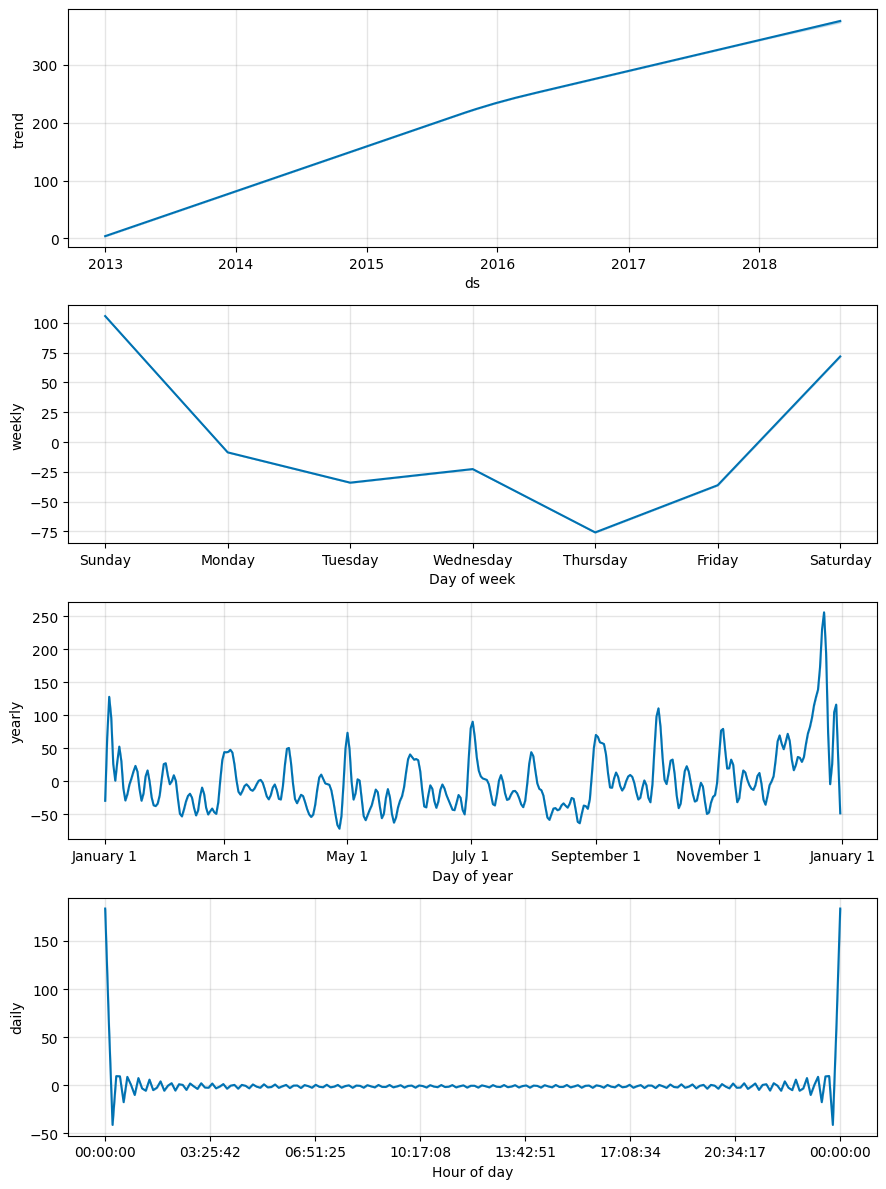

In [28]:
fig = model1.plot_components(prediction)


<h2>Residual Analysis</h2>

In [30]:
residuals = df['y'] - prediction['yhat']
import plotly.graph_objs as go

# Create a residuals plot
residual_trace = go.Scatter(
    x=df['ds'],  # Use the date for the x-axis
    y=residuals,  # Residuals on the y-axis
    mode='lines',
    name='Residuals'
)

# Construct a layout
layout = go.Layout(
    title="Residuals Plot",
    xaxis_title="Date",
    yaxis_title="Residuals"
)

# Create and show the figure
fig = go.Figure(data=[residual_trace], layout=layout)
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

